# Question 4


First of all, we should define **growth** and **sustainable growth**. By growth, we usually mean revenue growth or profit growth or a combination of both(unless we're currently running a free business model in which all that matters is userbase growth). Sustainable growth is a realistically attainable growth that a company could maintain without running into problems. There are two cases that growth can run the company "into the problem":

- The growth rate is too high that the company must raise new fund to drive it (and it is not willing to do so)
- The growth rate is too low that the company can't return on investments in a reasonable amount of time.

Here we consider the second case and try to propose a plan to prevent too low growth rate. The "finding sustainable growth" problem is similar to finding product-market fit, which is a situation that you don't need to spend massive fortunes on marketing to gain new users. They come naturally with the word of mouth spread from current customers because they've found a solution to their problems and a real value in your product. To be more precise, in a sustainable growth period of our product, we expect:

- A decrease in customer acquisition costs(or reaching some stable point),
- Revenue increase by:
    - Increase in conversion rate (from customer acquisition(app installation) to finalized purchases),
    - Increase in repeat purchase rate
    - Increase in purchase frequency
    - A decrease in time between purchases

These are all signs of having a product which is fit with some market's needs. We assume we can't lower the customer acquisition cost below the current cost, So we focus on improving the other four metrics discussed above. We propose three strategies to reach sustainable growth:

1. Piping in customers with more relevant needs to the product's funnel. To do this, we should focus the marketing material on customer segments that we think our product serves their needs better than others. This will lead to better conversion and more retention in the long term.
2. Optimizing product steps through user experience optimizations. This will lead to better conversion.
3. Trying to improve retention through tactics like retention email campaigns, customer loyalty programs, and gamification.

Before making proposing any plans, let's take a look at the current situation.

## Current Situation

First, we import data and take a look at it:

In [1]:
import pandas as pd

engagement = pd.read_excel('Assessment Data.xlsx', 'User Engagement')
orders = pd.read_excel('Assessment Data.xlsx', 'Orders')

In [2]:
engagement.head()

Date                              Device id event_type  \
0 2020-03-01 00:00:42.875  192cdaac-a33b-457a-97b2-8ae6e4cba36eR     Step 3   
1 2020-03-01 00:01:25.957  192cdaac-a33b-457a-97b2-8ae6e4cba36eR     Step 4   
2 2020-03-01 00:03:51.508  192cdaac-a33b-457a-97b2-8ae6e4cba36eR     Step 3   
3 2020-03-01 00:05:38.995  192cdaac-a33b-457a-97b2-8ae6e4cba36eR     Step 3   
4 2020-03-01 00:06:46.959  192cdaac-a33b-457a-97b2-8ae6e4cba36eR     Step 4   

      device_type platform device_manufacturer device_carrier  
0  HUAWEI Y9 2019  Android              HUAWEI       Irancell  
1  HUAWEI Y9 2019  Android              HUAWEI       Irancell  
2  HUAWEI Y9 2019  Android              HUAWEI       Irancell  
3  HUAWEI Y9 2019  Android              HUAWEI       Irancell  
4  HUAWEI Y9 2019  Android              HUAWEI       Irancell

In [3]:
orders.head()

User Id     User SignUpDate  \
0  000273bb-0195-4e7f-91d5-4e6c1e46a178 2020-01-23 11:28:05   
1  0007399f-1251-4d23-90c8-e8328c2c0472 2020-02-02 10:13:35   
2  0007399f-1251-4d23-90c8-e8328c2c0472 2020-02-02 10:13:35   
3  000cb199-8de0-4b23-aeac-dd5428ae7e86 2019-08-12 15:15:02   
4  000cb199-8de0-4b23-aeac-dd5428ae7e86 2019-08-12 15:15:02   

           Order Date  is Finalized  
0 2020-01-23 15:04:38         False  
1 2020-02-02 13:45:50         False  
2 2020-02-02 16:12:28         False  
3 2019-08-12 19:45:03         False  
4 2019-08-12 19:51:15         False

### Customer retention performance
We define repeat purchase frequency like:

\begin{equation}
    \text{Repeat Purchase Rate(RPR)} = \frac{\text{Number of Customers Who Bought More Than Once(6 months)}}{\text{Total number of customers(6 months)}}
\end{equation}

Now we compute current RPR:

In [4]:
tot_customers = orders['User Id'].nunique()
# Filter out not finalized orders
final_orders = orders[orders['is Finalized'] == True]
v = final_orders['User Id'].value_counts()
rep_customers = len(v.index[v.gt(2)])
rpr = rep_customers / tot_customers

print(f"rpr is {rpr * 100:.2f}")

rpr is 1.87


So in the last six months, only 1.8 percent of the customers completed a purchase more than once. This is far distant from business expectations. 

We define purchase frequency like:

\begin{equation}
    \text{Purchase Frequency(PF)} = \frac{\text{Number of Orders(6 months)}}{\text{Number of unique customers(6 months)}}
\end{equation}

Now we compute PF for the last six months:

In [5]:
pf = len(final_orders) / tot_customers

print(f"pf is {pf:0.2f}")

pf is 0.66


This means an average customer makes 0.66 purchases each 6 month. And at last, we define time between purchases like:

\begin{equation}
    \text{Time Between Purchases} = \frac{\text{180 days}}{\text{Purchase Frequency}}
\end{equation}

And then compute it:

In [6]:
tbp = 180 / pf

print(f"time between purchases is: {tbp:.2f}")

time between purchases is: 272.30


This means the average customer makes a purchase every 272 days. 
### Product funnel
Now we consider our product funnel:

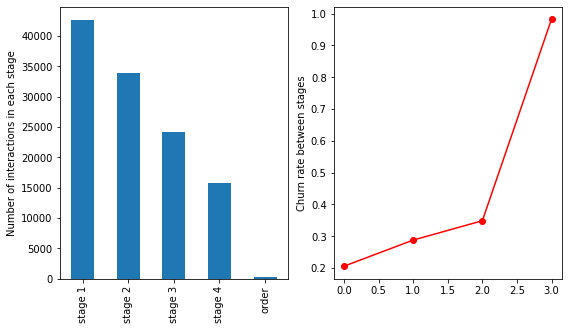

In [7]:
n = len(engagement)  # total number of interactions
n_steps = engagement['event_type'].value_counts()

funnel_stages = pd.Series({
    "stage 1": n,
    "stage 2": n - n_steps['Step 1'],
    "stage 3": n - n_steps['Step 1'] - n_steps['Step 2'],
    "stage 4": n - n_steps['Step 1'] - n_steps['Step 2'] - n_steps['Step 3'],
    "order": n - n_steps['Step 1'] - n_steps['Step 2'] - n_steps['Step 3'] - n_steps['Step 4']
})

churns = pd.Series([
    1 - funnel_stages['stage 2'] / funnel_stages['stage 1'],
    1 - funnel_stages['stage 3'] / funnel_stages['stage 2'],
    1 - funnel_stages['stage 4'] / funnel_stages['stage 3'],
    1 - funnel_stages['order'] / funnel_stages['stage 4']
])

import matplotlib.pyplot as plt

plt.figure(figsize=(9, 5))

plt.subplot(121)

funnel_stages.plot.bar()
plt.ylabel("Number of interactions in each stage");

plt.subplot(122)
churns.plot(style='ro-')
plt.ylabel("Churn rate between stages");

As we see, must of the churn happens at the last stage(going from step 4 to order). This can have several reasons depending on the context of the problem(which I'm unaware of):

- UI problems(for example, not big enough call to action)
- Technical issues (Back-End is not responsive)
- People tend to gain information from us but purchase from another place
- People can't trust us for the actual purchase(Lack of E-namad or other trust making elements)
- Our price tags are not competitive

At last, by defining conversion rate like:

\begin{equation}
    \text{conversion rate} = \frac{\text{number of unique devices which purchased}}{\text{number of all unique devices}}
\end{equation}

We have:

In [8]:
n_devices = engagement['Device id'].nunique()
eng_customers = engagement[engagement['event_type'] == 'Order']
n_unique_customers = eng_customers['Device id'].nunique()

print(f"conversion rate is: {n_unique_customers / n_devices * 100:.2f}")

conversion rate is: 2.45


Assuming these are real data from a hotel booking website, the industry's average conversion rate is about 2.2 %([source](https://www.hotelariadigital.pt/single-post/2019/10/23/The-real-talk-on-hotel-website-conversion-rates)), so this is not a bad number. But it can go higher if we can find a workaround to high churn from stage 4 to placing an order.

### Cohorts and Segments
First, we consider the yearly cohorts of the sign-up date.

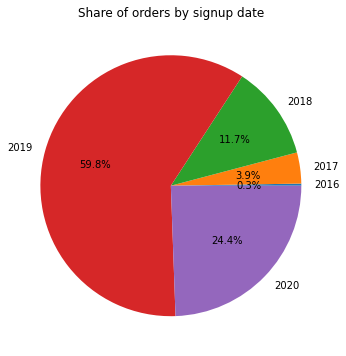

In [9]:
signup_orders = orders.groupby(orders['User SignUpDate'].dt.year)

signup_orders['User Id'].count().plot.pie(figsize=(6, 6), autopct='%.1f%%')

plt.ylabel("")
plt.title("Share of orders by signup date");

It seems that people who signed up in 2019 had more orders than the others, but this conclusion is right **only if** we know the number of total users who signed up in each year, not just those who put an order in the last six months. So we don't conclude anything from these cohorts. This only shows that we gained the majority of our customers in the last year or so.

Now let's see which months are strongest in our sales.

Text(0.5, 0, 'Month of year(1 and 2 are in 2020)')

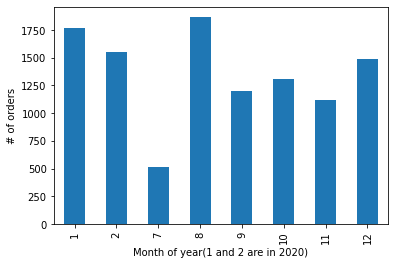

In [10]:
final_orders_grouped = final_orders.groupby(final_orders['Order Date'].dt.month)
final_orders_grouped['Order Date'].count().plot.bar()
plt.ylabel("# of orders")
plt.xlabel("Month of year(1 and 2 are in 2020)")

Months 7 ~ 12 are in year 2019 and months 1 and 2 are in 2020.

In [11]:
final_orders['Order Date'].min()

Timestamp('2019-07-23 00:05:38')

In [12]:
final_orders['Order Date'].max()

Timestamp('2020-02-19 23:59:13')

The data is from 1 Mordad 1398 until 30 Bahman 1398, so it is not affected by the outbreak of Coronavirus. The data from 7/19 only includes seven days, so it is not comparable to other months. Also, the 2/20 month is 11 days shy of a full month.

Most sales come from August(Mordad-Shahrivar), Then January(Day-Bahman) and February(Bahman). The source of changes seems seasonal and is not driven by product/marketing efforts because they are not persistent and fluctuate.

Another interesting question is, does conversion depend on the platform? To answer that, let's separate Android and iOS user engagement first:

Text(0, 0.5, 'Percentage of orders in all user interactions')

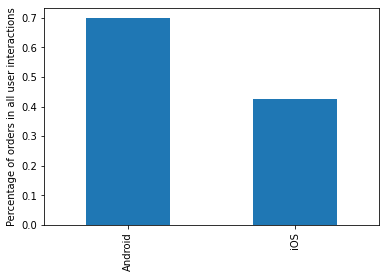

In [13]:
andr_engagement = engagement[engagement['platform'] == 'Android']
ios_engagement = engagement[engagement['platform'] == 'iOS']

platform_comparison = pd.Series({
    "Android": andr_engagement['event_type'].value_counts()['Order'] / len(andr_engagement) * 100,
    "iOS": ios_engagement['event_type'].value_counts()['Order'] / len(ios_engagement) * 100
})


platform_comparison.plot.bar()
plt.ylabel("Percentage of orders in all user interactions")

Android users did better than iOS, but the difference is not big enough to assume there is a particular attribute in them that lead to this. Maybe the user experience of our android app is just better.

To the best of my efforts(and this includes other efforts not mentioned here), no cohorts or segments are coming out of this data that outperform the others significantly.

## Proposed plan

We proposed three strategies in the intro section. The first one was focusing product and marketing on the customer segments, which their needs are more fit with the product. We believe this is the most effective strategy of the three. Still, unfortunately, we couldn't find any segment or cohort which significantly outperform others, from **this data**, so further information is needed.

Regarding the second strategy, we proposed some guesses about the high churn in the last step of the product. To prove/disprove these guesses, the product team needs to do careful experiments and iterate fast. We assume a product team consisting of:

- A product manager
- A product designer
- A back-End developer
- A front-End developer

Need at most three months for experimentation. Assuming 300 staff-hours each month for these people, at most 900 staff-hours of work is needed. Considering an average salary of 50,000T per hour for these people, We need 45,000,000T for this part of the plan.

About the third strategy, we can start with a simple tactic like SMS and email retention campaigns, which uses promotion as a motivation for bringing back former customers. The current time between purchases is 272 days. We set our target to reduce this to 90 days, So the average user buys four times a year.

Let's say the costs of this strategy is all about promotions and the cost of sending SMS to customers. Assume N to be the number of former customers who hadn't purchased from us in the last 90 days. If we send them SMS messages containing promotion and 10 percent of them buy from us, total costs are:

\begin{equation}
    \text{total costs of retention campaign} = 0.1N \times (\text{promotion per customer}) + N \times cost_{SMS}
\end{equation}

Now let's see with our current data of customers, how much that N would be:

In [14]:
from datetime import timedelta

time_limit = orders['Order Date'].max() - timedelta(days=90)

orders_before_90_days_ago = orders[orders['Order Date'] <= time_limit]

In [15]:
orders_before_90_days_ago['User Id'].nunique()

8500

So 8500 customers bought more than 90 days before our last order in 2020/2/19. Assuming the average basket is 300,000T, 5 % off as promotion, and 20T for each SMS cost, total costs will be 12,920,000T. If the average commission on each purchase is 15 %, the total revenue generated will be 38,250,000T.

We can keep doing this every 90 days. If we manage to form a habit of using our product in our customers, every time the number of people who hadn't bought more in the last 90 days becomes less and less, so the costs of the campaign decrease.